In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import  SelectFromModel,variance_threshold
import numpy as np
from numpy import sort
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score,f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import category_encoders as ce

In [117]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

In [118]:
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,0,0,0,0,0,0,0,0,0,1,-1,-1,1,4,1,5,4,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,2,2,-1,4,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,1,1,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [119]:
sample_sub.head()

,ID,no_financial_services,other_only,mm_only,mm_plus
0,2352,0.5423,0.9987,0.12,0.0123
1,8208,NaN,NaN,NaN,NaN
2,2785,NaN,NaN,NaN,NaN
3,2967,NaN,NaN,NaN,NaN
4,1697,NaN,NaN,NaN,NaN


In [120]:
train['mobile_money_classification'].unique()

array([0, 3, 2, 1], dtype=int64)

In [121]:
pd.set_option('display.max_columns',None)

In [122]:
train.drop(columns=['mobile_money','savings','borrowing','insurance'],axis=1,inplace=True)
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,-4.460442,29.811396,0
1,1258,40,1,1,3,5,1,1,1,0,0,0,0,0,0,0,0,0,0,1,-1,-1,1,4,1,5,4,4,1,4,-6.176438,39.244871,3
2,331,18,2,4,6,3,2,1,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,1,1,-6.825702,37.652798,2
3,6729,50,1,1,3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,2,2,-1,4,-1,1,4,-3.372049,35.808307,3
4,8671,34,1,1,1,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,1,1,-1,1,4,-7.179645,31.039095,3


In [123]:
test.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,2,1,3,6,2,1,0,0,1,0,0,0,0,0,0,0,0,-1,-1,1,1,6,1,4,5,-1,1,4,-2.596421,32.913584
1,8208,53,1,1,3,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,4,1,-1,1,4,-1.778303,34.062640
2,2785,23,2,1,3,5,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,4,1,4,1,-1,1,1,-1.851789,31.536866
3,2967,30,2,3,3,4,1,2,0,1,0,0,0,0,0,0,1,0,0,-1,1,-1,2,-1,2,-1,1,-1,1,4,-1.235656,34.229012
4,1697,28,2,1,5,4,2,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,4,1,6,4,3,1,2,-7.780934,35.691878


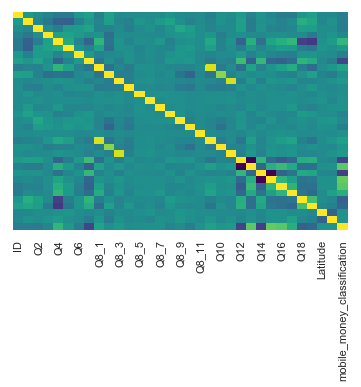

In [124]:
sns.heatmap(train.corr(),yticklabels=False,cbar=False,cmap='viridis')

## checking for outliers in the age column

Text(0.5, 0, 'Age')

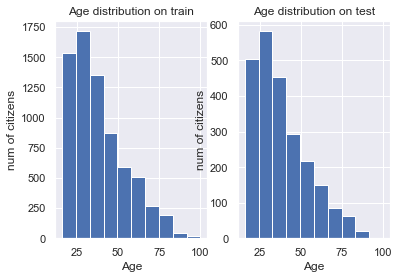

In [125]:
plt.subplot(1, 2, 1)
fig = train.Q1.hist()
fig.set_title('Age distribution on train')
fig.set_ylabel('num of citizens')
fig.set_xlabel('Age')
plt.subplot(1, 2, 2)
fig = test.Q1.hist()
fig.set_title('Age distribution on test')
fig.set_ylabel('num of citizens')
fig.set_xlabel('Age')

from the above, we can see that the distribution is gaussian, it is skewded to the left 
.so the outliers will be treated based on quatiles 


using the boxplot to see the outliers 

Text(0.5, 0, 'Age')

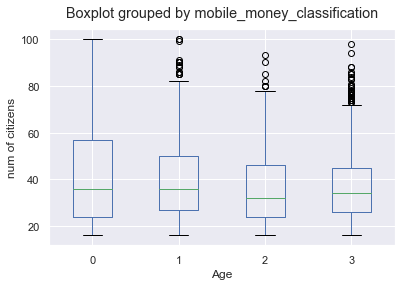

In [126]:
fig = train.boxplot(column='Q1',by='mobile_money_classification')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('Age')


In [127]:
train.Q1.describe()

count    7094.000000
mean       38.239498
std        16.332148
min        16.000000
25%        25.000000
50%        35.000000
75%        48.000000
max       100.000000
Name: Q1, dtype: float64

In [128]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train.Q1.quantile(0.75) - train.Q1.quantile(0.25)

lower_fence = train.Q1.quantile(0.25) - (IQR * 1.5)
Upper_fence = train.Q1.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-9.5, 82.5)

In [129]:
# to see the actual number of citiziens being an outlier
print('total number of citizens: {}'.format(train.shape[0]))
print('total number of citizens older than 80: {}'.format(train[train.Q1>80].shape[0]))


total number of citizens: 7094
total number of citizens older than 80: 96


In [130]:
#who are this people older than 80
train[train.Q1>80].head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,-4.460442,29.811396,0
35,8121,86,1,1,1,3,1,2,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,2,-1,1,-1,4,4,-11.467450,36.979288,1
185,1541,82,1,1,1,3,2,2,0,1,0,1,0,0,0,0,0,0,0,-1,1,-1,2,-1,2,-1,1,-1,4,4,-9.954110,39.328966,1
256,6316,94,1,1,1,1,2,2,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,2,-1,1,-1,4,4,-5.615290,38.275232,0
327,2998,85,2,3,2,4,2,2,0,0,0,0,0,0,0,0,0,1,0,-1,-1,-1,2,-1,2,-1,1,-1,4,4,-5.037426,38.881332,0


In [131]:
train.loc[train.Q1>80,'Q1']= 80 #replacing this outliers with 80(which is the boundary obtained by IQR assumption)
test.loc[test.Q1>80,'Q1']= 80 #replacing this outliers with 80(which is the boundary obtained by IQR assumption)

##end of outliers in age 

In [132]:
#columns with binary features
#Q2,Q6,Q7,Q8_1 to Q8_11,Q12,Q14
col = ['Q2','Q6','Q7','Q12','Q14']

In [133]:
for cols in col:
    coded = []
    for i in train[cols]:
        if i == 1:
            coded.append(0)
        else:
            coded.append(1)
    train[cols] =coded
    
for cols in col:
    coded = []
    for i in test[cols]:
        if i == 1:
            coded.append(0)
        else:
            coded.append(1)
    test[cols] =coded           
        

In [134]:
train.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude,mobile_money_classification
0,5086,80,1,3,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,1,-1,1,-1,1,-1,4,4,-4.460442,29.811396,0
1,1258,40,0,1,3,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1,-1,0,4,0,5,4,4,1,4,-6.176438,39.244871,3
2,331,18,1,4,6,3,1,0,0,0,0,0,0,0,0,0,1,0,0,-1,-1,-1,1,-1,1,-1,1,-1,1,1,-6.825702,37.652798,2
3,6729,50,0,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,0,2,1,-1,4,-1,1,4,-3.372049,35.808307,3
4,8671,34,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,1,-1,0,1,1,-1,1,4,-7.179645,31.039095,3


In [135]:
test.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,1,1,3,6,1,0,0,0,1,0,0,0,0,0,0,0,0,-1,-1,1,0,6,0,4,5,-1,1,4,-2.596421,32.913584
1,8208,53,0,1,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,1,-1,0,4,1,-1,1,4,-1.778303,34.062640
2,2785,23,1,1,3,5,0,0,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,0,4,0,4,1,-1,1,1,-1.851789,31.536866
3,2967,30,1,3,3,4,0,1,0,1,0,0,0,0,0,0,1,0,0,-1,1,-1,1,-1,1,-1,1,-1,1,4,-1.235656,34.229012
4,1697,28,1,1,5,4,1,0,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,0,4,0,6,4,3,1,2,-7.780934,35.691878


In [136]:
fucked_col = ['Q3','Q4','Q5','Q9','Q10','Q11','Q13','Q15','Q16','Q17','Q18','Q19']

In [137]:
df_cat_train = pd.DataFrame(data=train,columns=fucked_col)
df_cat_test = pd.DataFrame(data=test,columns=fucked_col)
df_cat_train.head()

,Q3,Q4,Q5,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19
0,3,1,1,-1,-1,-1,-1,-1,1,-1,4,4
1,1,3,5,1,-1,-1,4,5,4,4,1,4
2,4,6,3,-1,-1,-1,-1,-1,1,-1,1,1
3,1,3,1,-1,-1,-1,2,-1,4,-1,1,4
4,1,1,1,-1,1,-1,-1,1,1,-1,1,4


In [138]:
df_cat_test.head()

,Q3,Q4,Q5,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19
0,1,3,6,-1,-1,1,6,4,5,-1,1,4
1,1,3,1,-1,1,-1,-1,4,1,-1,1,4
2,1,3,5,-1,-1,-1,4,4,1,-1,1,1
3,3,3,4,-1,1,-1,-1,-1,1,-1,1,4
4,1,5,4,-1,-1,-1,4,6,4,3,1,2


In [139]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 12), (2365, 12))

In [140]:
def freq_dist(df_categories):
    category_count = df_categories['Q3'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q3')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q3',fontsize = 12)
    plt.show()

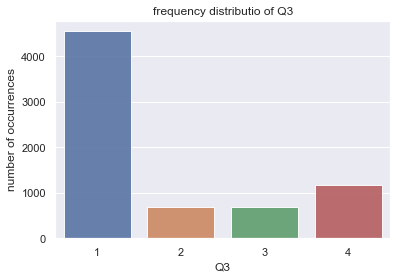

In [141]:
freq_dist(df_cat_train)

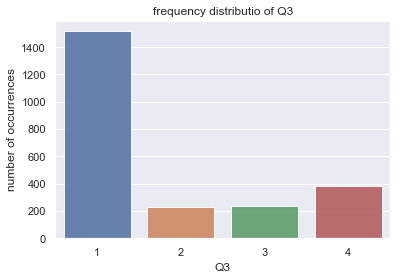

In [142]:
freq_dist(df_cat_test)

In [143]:
#since both have approximate distribution and a spike of one label while the rest are level, i will give priority to the highly occurred labe
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q3'],prefix='Q3_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q3'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q3'],prefix='Q3_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q3'],inplace= True,axis=1)
df_cat_train.head()

,Q4,Q5,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4
0,1,1,-1,-1,-1,-1,-1,1,-1,4,4,0,0,1,0
1,3,5,1,-1,-1,4,5,4,4,1,4,1,0,0,0
2,6,3,-1,-1,-1,-1,-1,1,-1,1,1,0,0,0,1
3,3,1,-1,-1,-1,2,-1,4,-1,1,4,1,0,0,0
4,1,1,-1,1,-1,-1,1,1,-1,1,4,1,0,0,0


In [144]:
df_cat_train.head()

,Q4,Q5,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4
0,1,1,-1,-1,-1,-1,-1,1,-1,4,4,0,0,1,0
1,3,5,1,-1,-1,4,5,4,4,1,4,1,0,0,0
2,6,3,-1,-1,-1,-1,-1,1,-1,1,1,0,0,0,1
3,3,1,-1,-1,-1,2,-1,4,-1,1,4,1,0,0,0
4,1,1,-1,1,-1,-1,1,1,-1,1,4,1,0,0,0


In [145]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 15), (2365, 15))

In [146]:
def freq_dist(df_categories):
    category_count = df_categories['Q4'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q4')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q4',fontsize = 12)
    plt.show()

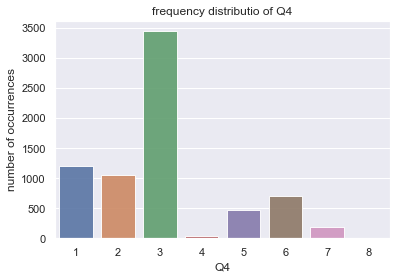

In [147]:
freq_dist(df_cat_train)

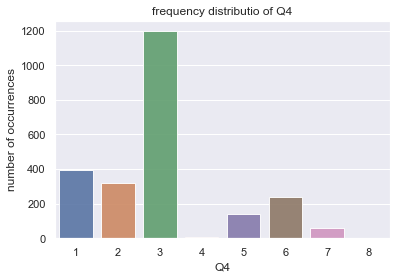

In [148]:
freq_dist(df_cat_test)

In [149]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q4'],prefix='Q4_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q4'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q4'],prefix='Q4_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q4'],inplace= True,axis=1)
df_cat_train.head()

,Q5,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8
0,1,-1,-1,-1,-1,-1,1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0
1,5,1,-1,-1,4,5,4,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0
2,3,-1,-1,-1,-1,-1,1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0
3,1,-1,-1,-1,2,-1,4,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0
4,1,-1,1,-1,-1,1,1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0


In [150]:
df_cat_test.head()

,Q5,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8
0,6,-1,-1,1,6,4,5,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0
1,1,-1,1,-1,-1,4,1,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0
2,5,-1,-1,-1,4,4,1,-1,1,1,1,0,0,0,0,0,1,0,0,0,0,0
3,4,-1,1,-1,-1,-1,1,-1,1,4,0,0,1,0,0,0,1,0,0,0,0,0
4,4,-1,-1,-1,4,6,4,3,1,2,1,0,0,0,0,0,0,0,1,0,0,0


In [151]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 22), (2365, 22))

In [152]:
def freq_dist(df_categories):
    category_count = df_categories['Q5'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q5')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q5',fontsize = 12)
    plt.show()

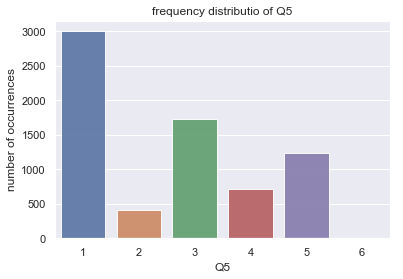

In [153]:
freq_dist(df_cat_train)

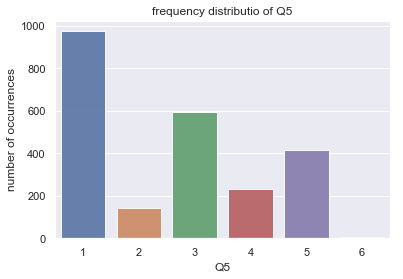

In [154]:
freq_dist(df_cat_test)

In [155]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q5'],prefix='Q5_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q5'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q5'],prefix='Q5_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q5'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6
0,-1,-1,-1,-1,-1,1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,-1,-1,4,5,4,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-1,-1,-1,-1,-1,1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,-1,-1,-1,2,-1,4,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,-1,1,-1,-1,1,1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [156]:
df_cat_test.head()

,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6
0,-1,-1,1,6,4,5,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,-1,1,-1,-1,4,1,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,-1,-1,-1,4,4,1,-1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,-1,1,-1,-1,-1,1,-1,1,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,-1,-1,-1,4,6,4,3,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [157]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 27), (2365, 27))

In [158]:
def freq_dist(df_categories):
    category_count = df_categories['Q9'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q9')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q9',fontsize = 12)
    plt.show()

In [159]:
df_cat_train['Q9'].unique(),df_cat_test['Q9'].unique()

(array([-1,  1,  3,  6,  2,  5,  7], dtype=int64),
 array([-1,  3,  1,  2,  6,  7,  5,  4], dtype=int64))

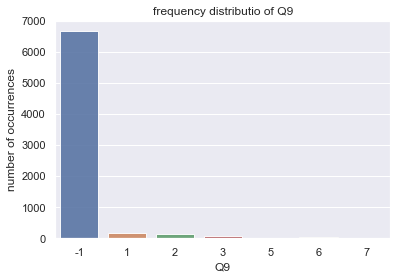

In [160]:
freq_dist(df_cat_train)

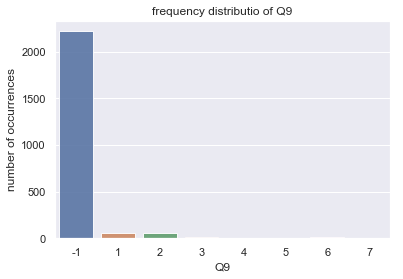

In [161]:
freq_dist(df_cat_test)

In [162]:
#since both have approximate distribution and a spike of one label while the rest are level, i will give priority to the highly occurred label
df_cat_test['Q9_new'] = np.where(df_cat_test['Q9']==-1, 0, 1)
df_cat_train['Q9_new'] = np.where(df_cat_train['Q9']==-1, 0, 1)
df_cat_train.head()

,Q9,Q10,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new
0,-1,-1,-1,-1,-1,1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,-1,-1,4,5,4,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,-1,-1,-1,-1,-1,1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,-1,-1,-1,2,-1,4,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,-1,1,-1,-1,1,1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [163]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 28), (2365, 28))

In [164]:
def freq_dist(df_categories):
    category_count = df_categories['Q10'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q10')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q10',fontsize = 12)
    plt.show()

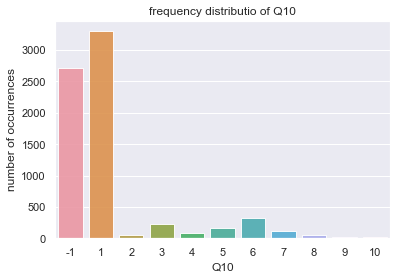

In [165]:
freq_dist(df_cat_train)

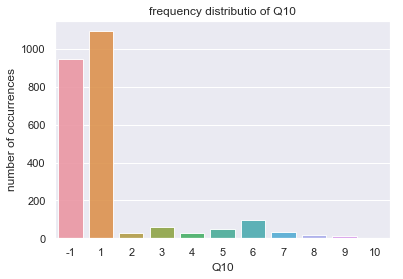

In [166]:
freq_dist(df_cat_test)

In [167]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q10'],prefix='Q10_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q10'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q10'],prefix='Q10_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q10'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10
0,-1,-1,-1,-1,1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,-1,4,5,4,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
2,-1,-1,-1,-1,1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-1,-1,2,-1,4,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1,-1,-1,1,1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [168]:
df_cat_test.head()

,Q9,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10
0,-1,1,6,4,5,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,4,1,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,-1,-1,4,4,1,-1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-1,-1,-1,-1,1,-1,1,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-1,-1,4,6,4,3,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [169]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 38), (2365, 38))

In [170]:
def freq_dist(df_categories):
    category_count = df_categories['Q11'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q11')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q11',fontsize = 12)
    plt.show()

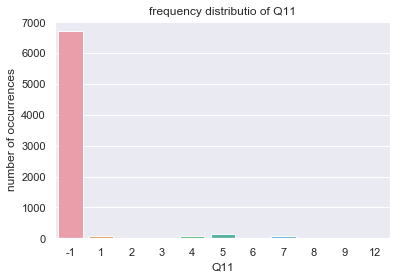

In [171]:
freq_dist(df_cat_train)

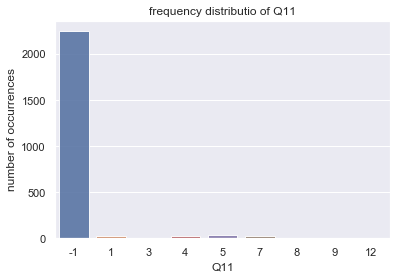

In [172]:
freq_dist(df_cat_test)

In [173]:
#since both have approximate distribution and a spike of one label while the rest are level, i will give priority to the highly occurred label
df_cat_test['Q11_new'] = np.where(df_cat_test['Q11']==-1, 0, 1)
df_cat_train['Q11_new'] = np.where(df_cat_train['Q11']==-1, 0, 1)
df_cat_train.head()

,Q9,Q11,Q13,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new
0,-1,-1,-1,-1,1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,-1,4,5,4,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,-1,-1,-1,-1,1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-1,-1,2,-1,4,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,-1,-1,-1,1,1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [174]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 39), (2365, 39))

In [175]:
def freq_dist(df_categories):
    category_count = df_categories['Q13'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q13')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q13',fontsize = 12)
    plt.show()

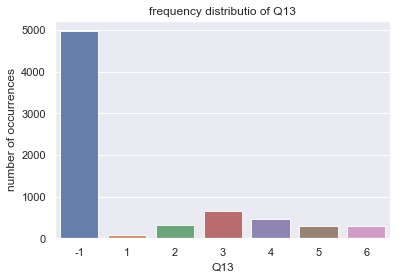

In [176]:
freq_dist(df_cat_train)

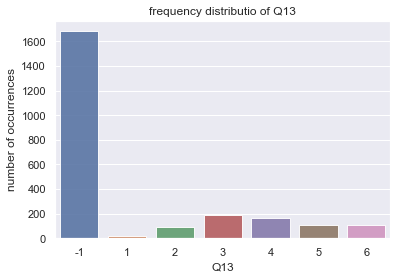

In [177]:
freq_dist(df_cat_test)

In [178]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q13'],prefix='Q13_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q13'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q13'],prefix='Q13_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q13'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q11,Q15,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6
0,-1,-1,-1,1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,-1,5,4,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1,-1,-1,1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-1,-1,-1,4,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-1,-1,1,1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [179]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 45), (2365, 45))

In [180]:
def freq_dist(df_categories):
    category_count = df_categories['Q15'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q15')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q15',fontsize = 12)
    plt.show()

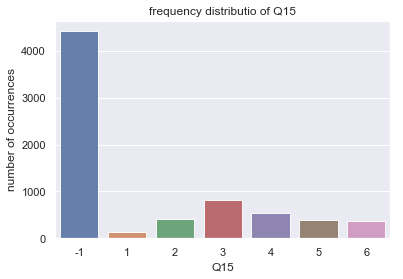

In [181]:
freq_dist(df_cat_train)

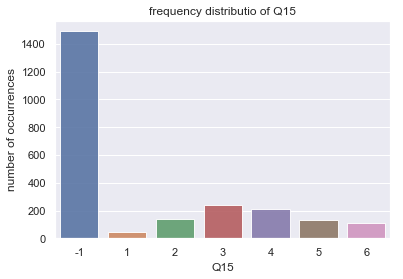

In [182]:
freq_dist(df_cat_test)

In [183]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q15'],prefix='Q15_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q15'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q15'],prefix='Q15_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q15'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q11,Q16,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6
0,-1,-1,1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,-1,4,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,-1,-1,1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-1,-1,4,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-1,-1,1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [184]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 51), (2365, 51))

In [185]:
def freq_dist(df_categories):
    category_count = df_categories['Q16'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q16')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q16',fontsize = 12)
    plt.show()

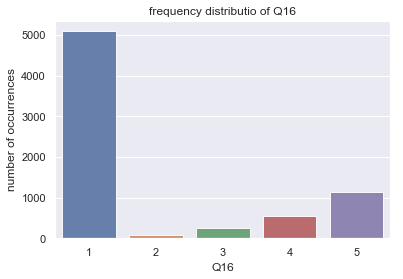

In [186]:
freq_dist(df_cat_train)

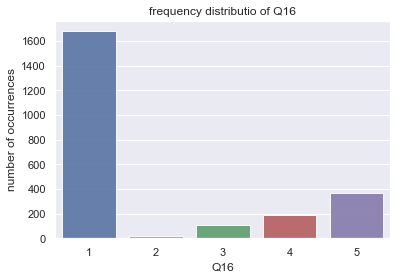

In [187]:
freq_dist(df_cat_test)

In [188]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q16'],prefix='Q16_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q16'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q16'],prefix='Q16_',drop_first=False)],axis = 1)
df_cat_test.drop(columns=['Q16'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q11,Q17,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5
0,-1,-1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,-1,4,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-1,-1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,-1,-1,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,-1,-1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [189]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 55), (2365, 55))

In [190]:
def freq_dist(df_categories):
    category_count = df_categories['Q17'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q17')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q17',fontsize = 12)
    plt.show()

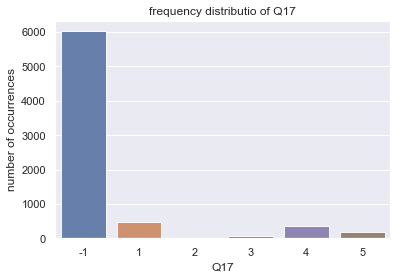

In [191]:
freq_dist(df_cat_train)

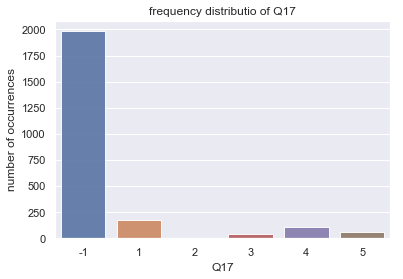

In [192]:
freq_dist(df_cat_test)

In [193]:
len(df_cat_train['Q17'].unique()),len(df_cat_test['Q17'].unique())

(6, 6)

In [194]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q17'],prefix='Q17_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q17'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q17'],prefix='Q17_',drop_first=False)],axis = 1)
df_cat_test.drop(columns=['Q17'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q11,Q18,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5
0,-1,-1,4,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,-1,-1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,-1,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,-1,-1,1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [195]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 60), (2365, 60))

In [196]:
def freq_dist(df_categories):
    category_count = df_categories['Q18'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q18')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q18',fontsize = 12)
    plt.show()

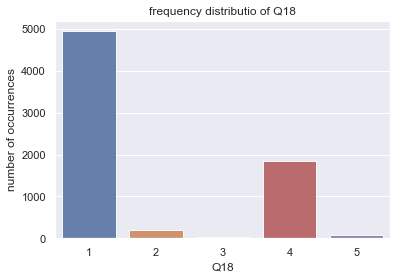

In [197]:
freq_dist(df_cat_train)

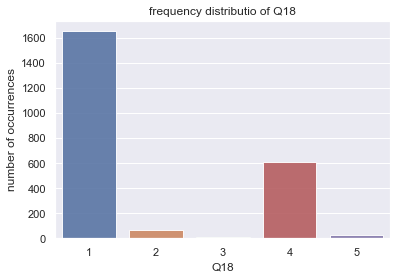

In [198]:
freq_dist(df_cat_test)

In [199]:
len(df_cat_train['Q18'].unique()),len(df_cat_test['Q18'].unique())

(5, 5)

In [200]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q18'],prefix='Q18_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q18'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q18'],prefix='Q18_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q18'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q11,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5
0,-1,-1,4,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,-1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,-1,-1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,-1,-1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,-1,-1,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [201]:
df_cat_test.head()

,Q9,Q11,Q19,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5
0,-1,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,-1,-1,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,-1,-1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,-1,-1,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,-1,-1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [202]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 64), (2365, 64))

In [203]:
def freq_dist(df_categories):
    category_count = df_categories['Q19'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(category_count.index,category_count.values, alpha = 0.9)
    plt.title('frequency distributio of Q19')
    plt.ylabel('number of occurrences',fontsize = 12)
    plt.xlabel('Q19',fontsize = 12)
    plt.show()

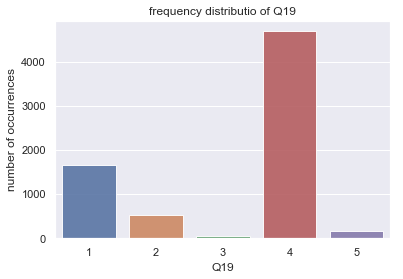

In [204]:
freq_dist(df_cat_train)

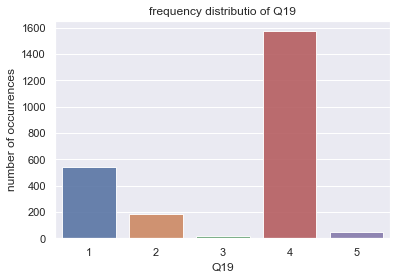

In [205]:
freq_dist(df_cat_test)

In [206]:
df_cat_train = pd.concat([df_cat_train,pd.get_dummies(df_cat_train['Q19'],prefix='Q19_',drop_first= False)],axis = 1)
df_cat_train.drop(columns=['Q19'],inplace= True,axis=1)
df_cat_test = pd.concat([df_cat_test,pd.get_dummies(df_cat_test['Q19'],prefix='Q19_',drop_first= False)],axis = 1)
df_cat_test.drop(columns=['Q19'],inplace= True,axis=1)
df_cat_train.head()

,Q9,Q11,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5
0,-1,-1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,-1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,-1,-1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,-1,-1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,-1,-1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [207]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 68), (2365, 68))

In [208]:
df_cat_test.head()

,Q9,Q11,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5
0,-1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,-1,-1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,-1,-1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,-1,-1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,-1,-1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [209]:
df_cat_train.columns

Index(['Q9', 'Q11', 'Q3__1', 'Q3__2', 'Q3__3', 'Q3__4', 'Q4__1', 'Q4__2',
       'Q4__3', 'Q4__4', 'Q4__5', 'Q4__6', 'Q4__7', 'Q4__8', 'Q5__1', 'Q5__2',
       'Q5__3', 'Q5__4', 'Q5__5', 'Q5__6', 'Q9_new', 'Q10__-1', 'Q10__1',
       'Q10__2', 'Q10__3', 'Q10__4', 'Q10__5', 'Q10__6', 'Q10__7', 'Q10__8',
       'Q10__9', 'Q10__10', 'Q11_new', 'Q13__-1', 'Q13__1', 'Q13__2', 'Q13__3',
       'Q13__4', 'Q13__5', 'Q13__6', 'Q15__-1', 'Q15__1', 'Q15__2', 'Q15__3',
       'Q15__4', 'Q15__5', 'Q15__6', 'Q16__1', 'Q16__2', 'Q16__3', 'Q16__4',
       'Q16__5', 'Q17__-1', 'Q17__1', 'Q17__2', 'Q17__3', 'Q17__4', 'Q17__5',
       'Q18__1', 'Q18__2', 'Q18__3', 'Q18__4', 'Q18__5', 'Q19__1', 'Q19__2',
       'Q19__3', 'Q19__4', 'Q19__5'],
      dtype='object')

In [210]:
np.shape(df_cat_train),np.shape(df_cat_test)

((7094, 68), (2365, 68))

In [211]:
df_cat_train.drop(columns=['Q9','Q11'],axis= 1,inplace= True)
df_cat_test.drop(columns=['Q9','Q11'],axis= 1,inplace= True)
df_cat_train.head()

,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [212]:
train.drop(columns=fucked_col,axis= 1,inplace= True)
test.drop(columns=fucked_col,axis= 1,inplace= True)
train.head()

,ID,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Latitude,Longitude,mobile_money_classification
0,5086,80,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,-4.460442,29.811396,0
1,1258,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-6.176438,39.244871,3
2,331,18,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,-6.825702,37.652798,2
3,6729,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-3.372049,35.808307,3
4,8671,34,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-7.179645,31.039095,3


In [213]:
np.shape(train),np.shape(test)

((7094, 21), (2365, 20))

In [214]:
train = pd.concat([train,df_cat_train],axis=1)
test = pd.concat([test,df_cat_test],axis=1)
train.head()

,ID,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Latitude,Longitude,mobile_money_classification,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5
0,5086,80,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,-4.460442,29.811396,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1258,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-6.176438,39.244871,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,331,18,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,-6.825702,37.652798,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,6729,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,-3.372049,35.808307,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,8671,34,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-7.179645,31.039095,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [215]:
test.head()

,ID,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Latitude,Longitude,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5
0,2352,30,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-2.596421,32.913584,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,8208,53,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,-1.778303,34.062640,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2785,23,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.851789,31.536866,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,2967,30,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,-1.235656,34.229012,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1697,28,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-7.780934,35.691878,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


## harvestine distance calculation 

In [216]:
def cal_distance(origin,destination):
    lat1,lon1 = origin
    lat2,lon2 = destination
    radius = 6371 #km
    
    dlat  = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat/2)*math.sin(dlat/2) + math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*math.sin(dlon/2)*math.sin(dlon/2)
    c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a))
    d = radius * c
    bearing = math.atan2(math.cos(lat1)*math.sin(lat2)-math.sin(lat1)*math.cos(lat2)*math.cos(lon2-lon1),math.sin(lon2-lon1)*math.cos(lat2))
    return d

In [217]:
'''train['Latitude']=train.Latitude.astype(float)
train['Longitude']=train.Longitude.astype(float)
test['Latitude']=test.Latitude.astype(float)
test['Longitude']=test.Longitude.astype(float)
train['Latitude2'] = np.round(train.Latitude).astype(float)
train['Longitude2'] = np.round(train.Longitude).astype(float)
test['Latitude2'] = np.round(test.Latitude).astype(float)
test['Longitude2'] = np.round(test.Longitude).astype(float)

'''

"train['Latitude']=train.Latitude.astype(float)\ntrain['Longitude']=train.Longitude.astype(float)\ntest['Latitude']=test.Latitude.astype(float)\ntest['Longitude']=test.Longitude.astype(float)\ntrain['Latitude2'] = np.round(train.Latitude).astype(float)\ntrain['Longitude2'] = np.round(train.Longitude).astype(float)\ntest['Latitude2'] = np.round(test.Latitude).astype(float)\ntest['Longitude2'] = np.round(test.Longitude).astype(float)\n\n"

In [218]:
train_lat1 = list(train.Latitude)
train_lon1 = list(train.Longitude)
train_lat2 = list(np.round(train.Latitude))
train_lon2 = list(np.round(train.Longitude))
train_dist = []
train_bearing = []
test_lat1 = list(test.Latitude)
test_lon1 = list(test.Longitude)
test_lat2 = list(np.round(test.Latitude))
test_lon2 = list(np.round(test.Longitude))
test_dist = []
test_bearing = []

In [219]:
count = 0
while count<len(train_lat1):
    d =cal_distance([train_lat1[count],train_lon1[count]],[train_lat2[count],train_lon2[count]])
    train_dist.append(d)
    #train_bearing.append[be]
    count = count + 1
    
count = 0
while count<len(test_lat1):
    d =cal_distance([test_lat1[count],test_lon1[count]],[test_lat2[count],test_lon2[count]])
    test_dist.append(d)
    #test_bearing.append[be]
    count = count + 1   

In [220]:
train_dist[10],test_dist[10]

(47.07628438145972, 16.829141546342473)

In [221]:
train['dist'] =  np.reshape(train_dist,(-1,1))
test['dist'] = np.reshape(test_dist,(-1,1))

In [224]:
train.tail()

,ID,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Latitude,Longitude,mobile_money_classification,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist
7089,8378,57,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,-5.811335,35.098103,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,23.618559
7090,881,32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-2.635156,32.945423,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,41.019123
7091,6672,22,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,-8.303729,31.059642,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,34.405314
7092,5416,28,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,-8.090712,35.836560,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,20.628938
7093,3946,78,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,-5.192204,38.764523,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,33.718682


In [226]:
test.tail()


,ID,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Latitude,Longitude,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist
2360,2245,26,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,-2.652871,32.288152,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,50.139864
2361,5651,50,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,-3.410241,31.509764,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,71.014835
2362,6463,49,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,-3.372177,33.911149,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,42.543631
2363,1508,28,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,-1.681963,33.707227,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,48.055631
2364,8385,70,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,-2.457108,33.636855,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,64.896537


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


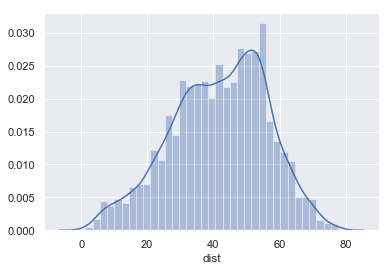

In [227]:
sns.distplot(train.dist)

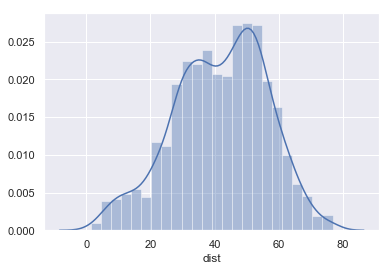

In [228]:
sns.distplot(test.dist)

In [229]:
train_lat_lon = pd.DataFrame(data=train,columns=['Latitude','Longitude'])
test_lat_lon = pd.DataFrame(data=test,columns=['Latitude','Longitude'])
train_lat_lon.head()

,Latitude,Longitude
0,-4.460442,29.811396
1,-6.176438,39.244871
2,-6.825702,37.652798
3,-3.372049,35.808307
4,-7.179645,31.039095


In [230]:
train_copy = train.copy()
test_copy = test.copy()

In [231]:
temp = ['Latitude', 'Longitude','ID']
test_copy.drop(columns=temp,inplace=True, axis = 1)
train_copy.drop(columns=temp, axis = 1,inplace=True)

In [232]:
train_copy.tail()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,mobile_money_classification,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist
7089,57,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,23.618559
7090,32,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,41.019123
7091,22,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,34.405314
7092,28,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,20.628938
7093,78,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,33.718682


In [234]:
test_copy.tail()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist
2360,26,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,50.139864
2361,50,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,71.014835
2362,49,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,42.543631
2363,28,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,48.055631
2364,70,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,64.896537


In [235]:
np.shape(train_copy),np.shape(test_copy)

((7094, 85), (2365, 84))

In [236]:
train_copy.drop_duplicates(keep='first')
np.shape(train_copy),np.shape(test_copy)

((7094, 85), (2365, 84))

## importing new external data

In [237]:
train_region = pd.read_csv('train_region.csv')
test_region = pd.read_csv('test_region.csv')
train_district = pd.read_csv('train_district.csv')
test_district = pd.read_csv('test_district.csv')
train_standalone_agent = pd.read_csv('train_standalone_agent.csv')
test_standalone_agent = pd.read_csv('test_standalone_agent.csv')
train_trading_hours = pd.read_csv('train_trading_hours.csv')
test_trading_hours = pd.read_csv('test_trading_hours.csv')
#train_sel_type = pd.read_csv('train_sel_training_type.csv')
#test_sel_type = pd.read_csv('test_sel_training_type.csv')
P1_train = pd.read_csv('P1_train.csv')
P1_test = pd.read_csv('P1_test.csv')
P2_train = pd.read_csv('P2_train.csv')
P2_test = pd.read_csv('P2_test.csv')
P3_train = pd.read_csv('P3_train.csv')
P3_test = pd.read_csv('P3_test.csv')

In [238]:
train_copy = pd.concat([train_copy,train_region],axis=1)
test_copy = pd.concat([test_copy,test_region],axis=1)
train_copy = pd.concat([train_copy,train_district],axis=1)
test_copy = pd.concat([test_copy,test_district ],axis=1)
train_copy = pd.concat([train_copy,train_standalone_agent],axis=1)
test_copy = pd.concat([test_copy,test_standalone_agent ],axis=1)
train_copy = pd.concat([train_copy,train_trading_hours],axis=1)
test_copy = pd.concat([test_copy,test_trading_hours ],axis=1)
#train_copy = pd.concat([train_copy,train_sel_type],axis=1)
#test_copy = pd.concat([test_copy,test_sel_type ],axis=1)
train_copy = pd.concat([train_copy,P1_train],axis=1)
test_copy = pd.concat([test_copy,P1_test],axis=1)
train_copy = pd.concat([train_copy,P2_train],axis=1)
test_copy = pd.concat([test_copy,P2_test],axis=1)
train_copy = pd.concat([train_copy,P3_train],axis=1)
test_copy = pd.concat([test_copy,P3_test],axis=1)
train_copy.head()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,mobile_money_classification,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist,region,district,Agent,trading_hours_cl,P1,P2,P3
0,80,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,55.305850,5,28,0,12,6.094800e+09,855402.2,0.104959
1,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,33.435761,21,123,0,12,1.236779e+11,1836548.9,2.408029
2,18,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,42.948120,11,70,0,12,2.481783e+10,1018372.0,1.724603
3,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,46.523223,0,27,0,12,3.154639e+10,1238484.6,0.479811
4,34,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,20.436137,15,73,0,12,1.063010e+10,388998.9,0.178938


In [239]:
np.shape(train_copy),np.shape(test_copy)

((7094, 92), (7094, 91))

## taking care of outliers in the newly imported data

Text(0.5, 0, 'region')

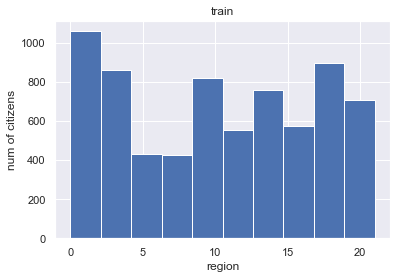

In [240]:
fig =  train_copy.region.hist()
fig.set_title('train')
fig.set_ylabel('num of citizens')
fig.set_xlabel('region')

Text(0.5, 0, 'region')

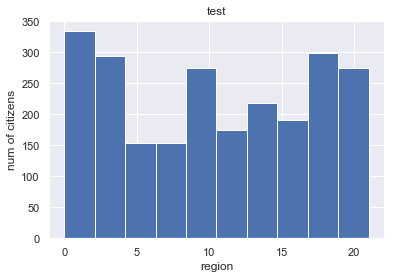

In [241]:
fig =  test_copy.region.hist()
fig.set_title('test')
fig.set_ylabel('num of citizens')
fig.set_xlabel('region')

Text(0.5, 0, 'region')

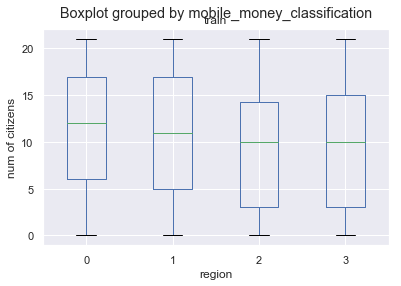

In [242]:
fig = train_copy.boxplot(column='region',by='mobile_money_classification')
fig.set_title('train')
fig.set_ylabel('num of citizens')
fig.set_xlabel('region')


Text(0.5, 0, 'region')

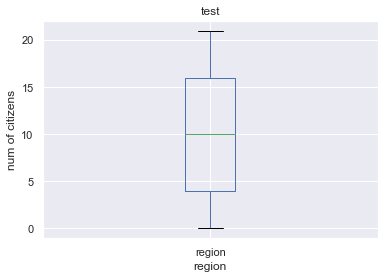

In [243]:
fig = test_copy.boxplot(column='region')
fig.set_title('test')
fig.set_ylabel('num of citizens')
fig.set_xlabel('region')

Text(0.5, 0, 'district')

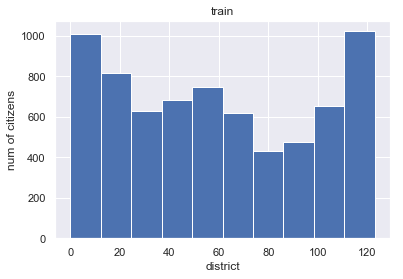

In [244]:
fig =  train_copy.district.hist()
fig.set_title('train')
fig.set_ylabel('num of citizens')
fig.set_xlabel('district')

Text(0.5, 0, 'district')

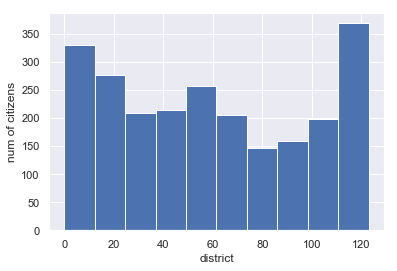

In [245]:
fig =  test_copy.district.hist()
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('district')

Text(0.5, 0, 'district')

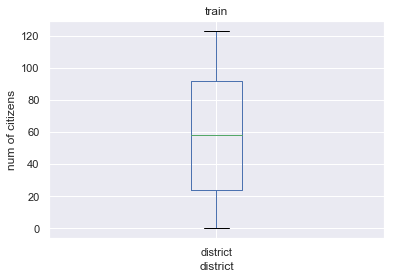

In [246]:
fig = train_copy.boxplot(column='district')
fig.set_title('train')
fig.set_ylabel('num of citizens')
fig.set_xlabel('district')

Text(0.5, 0, 'district')

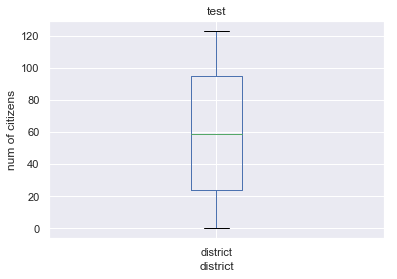

In [247]:
fig = test_copy.boxplot(column='district')
fig.set_title('test')
fig.set_ylabel('num of citizens')
fig.set_xlabel('district')

Text(0.5, 0, 'P1')

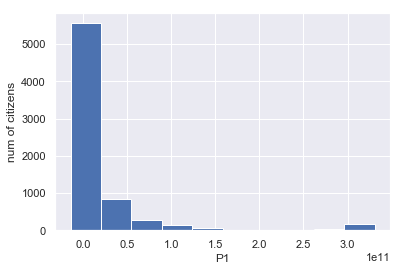

In [248]:
fig =  train_copy.P1.hist()
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P1')

Text(0.5, 0, 'P1')

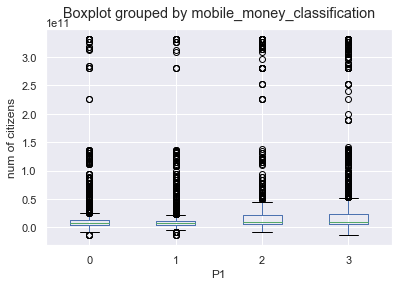

In [249]:
fig = train_copy.boxplot(column='P1',by='mobile_money_classification')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P1')


Text(0.5, 0, 'P1')

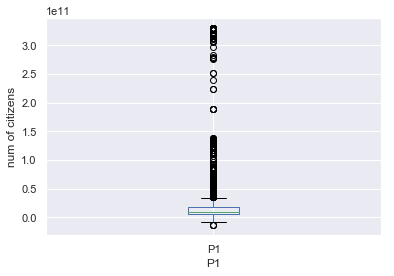

In [250]:
fig = test_copy.boxplot(column='P1')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P1')

In [251]:
train_copy.P1.describe()

count    7.094000e+03
mean     2.565199e+10
std      5.550529e+10
min     -1.406791e+10
25%      5.570570e+09
50%      8.984682e+09
75%      1.758977e+10
max      3.309435e+11
Name: P1, dtype: float64

In [252]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train_copy.P1.quantile(0.75) - train_copy.P1.quantile(0.25)

lower_fence = train_copy.P1.quantile(0.25) - (IQR * 1.5)
Upper_fence = train_copy.P1.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-12458224000.0, 35618560000.0)

In [253]:
train_copy.loc[train_copy.P1>Upper_fence,'P1']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.P1>Upper_fence,'P1']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
train_copy.loc[train_copy.P1>lower_fence,'P1']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.P1>lower_fence,'P1']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)


Text(0.5, 0, 'P2')

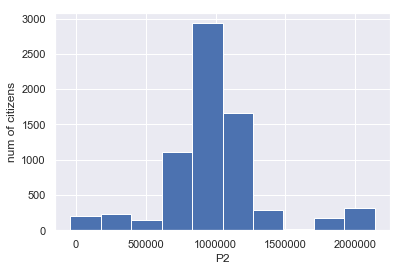

In [254]:
fig =  train_copy.P2.hist()
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P2')


Text(0.5, 0, 'P2')

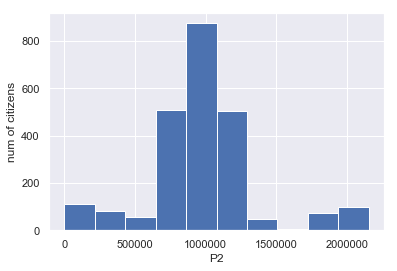

In [255]:
fig =  test_copy.P2.hist()
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P2')


In [256]:
train_copy.P2.describe()

count    7.094000e+03
mean     9.976333e+05
std      3.692859e+05
min     -4.041731e+04
25%      8.369771e+05
50%      9.746420e+05
75%      1.140024e+06
max      2.141219e+06
Name: P2, dtype: float64

In [257]:
upper_b = train_copy.P2.mean() + 3*train_copy.P2.std()
lower_b = train_copy.P2.mean() - 3*train_copy.P2.std()
upper_b,lower_b

(2105490.8916964782, -110224.33610526973)

In [258]:
train_copy.loc[train_copy.P2>upper_b,'P2']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.P2>upper_b,'P2']= upper_b #replacing this outliers with Upper_fence(which is the boundary obtained by Gaussian assumption)
train_copy.loc[train_copy.P2>lower_b,'P2']= lower_b #replacing this outliers with lower_fence(which is the boundary obtained by Gaussian assumption)
test_copy.loc[test_copy.P2>lower_b,'P2']= lower_b #replacing this outliers with lower_fence(which is the boundary obtained by Gaussian assumption)


Text(0.5, 0, 'P3')

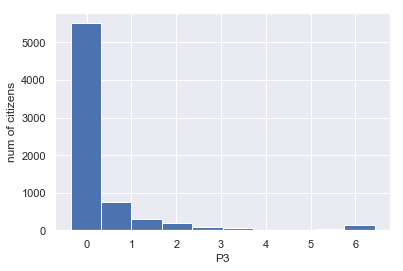

In [259]:
fig =  train_copy.P3.hist()
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P3')

Text(0.5, 0, 'P3')

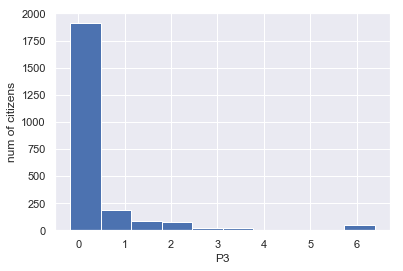

In [260]:
fig =  test_copy.P3.hist()
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P3')

Text(0.5, 0, 'P3')

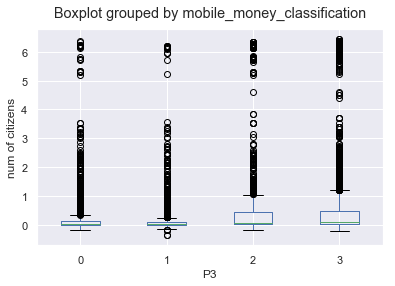

In [261]:
fig = train_copy.boxplot(column='P3',by='mobile_money_classification')
fig.set_title('')
fig.set_ylabel('num of citizens')
fig.set_xlabel('P3')


In [262]:
train_copy.P3.describe()

count    7094.000000
mean        0.445303
std         1.092578
min        -0.360155
25%         0.016691
50%         0.068769
75%         0.273959
max         6.434266
Name: P3, dtype: float64

In [263]:
# upper and lower boundaries for the outliers according to interquantile proximity rule

IQR = train_copy.P3.quantile(0.75) - train_copy.P1.quantile(0.25)

lower_fence = train_copy.P3.quantile(0.25) - (IQR * 1.5)
Upper_fence = train_copy.P3.quantile(0.75) + (IQR * 1.5)
lower_fence,Upper_fence

(-18687336000.394245, 18687336000.6849)

In [264]:
train_copy.loc[train_copy.P3>Upper_fence,'P3']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.P3>Upper_fence,'P3']= Upper_fence #replacing this outliers with Upper_fence(which is the boundary obtained by IQR assumption)
train_copy.loc[train_copy.P3>lower_fence,'P3']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)
test_copy.loc[test_copy.P3>lower_fence,'P3']= lower_fence #replacing this outliers with lower_fence(which is the boundary obtained by IQR assumption)


In [265]:
'''train_copy['reg_dist_focus'] = (train_copy.region + train_copy.district)/2
test_copy['reg_dist_focus'] = (test_copy.region + test_copy.district)/2
train_copy['p_mean'] = (train_copy.P1 + train_copy.P2 + train_copy.P3)*0.33
test_copy['p_mean'] = (test_copy.P1 + test_copy.P2 + test_copy.P3)*0.33
train_copy['distance'] = np.sqrt((train_copy.region)*(train_copy.region) + (train_copy.district)*(train_copy.district))
test_copy['distance'] = np.sqrt((test_copy.region)*(test_copy.region) + (test_copy.district)*(test_copy.district))
train_copy['P1_percentage'] = train_copy.P1 / np.sum([train_copy.P1, train_copy.P2, train_copy.P3])
test_copy['P1_percentage'] = test_copy.P1 / np.sum([test_copy.P1, test_copy.P2, test_copy.P3])
train_copy['P2_percentage'] = train_copy.P2 / np.sum([train_copy.P1, train_copy.P2, train_copy.P3])
test_copy['P2_percentage'] = test_copy.P2 / np.sum([test_copy.P1, test_copy.P2, test_copy.P3])
train_copy['P3_percentage'] = train_copy.P3 / np.sum([train_copy.P1, train_copy.P2, train_copy.P3])
test_copy['P3_percentage'] = test_copy.P3 / np.sum([test_copy.P1, test_copy.P2, test_copy.P3])'''

"train_copy['reg_dist_focus'] = (train_copy.region + train_copy.district)/2\ntest_copy['reg_dist_focus'] = (test_copy.region + test_copy.district)/2\ntrain_copy['p_mean'] = (train_copy.P1 + train_copy.P2 + train_copy.P3)*0.33\ntest_copy['p_mean'] = (test_copy.P1 + test_copy.P2 + test_copy.P3)*0.33\ntrain_copy['distance'] = np.sqrt((train_copy.region)*(train_copy.region) + (train_copy.district)*(train_copy.district))\ntest_copy['distance'] = np.sqrt((test_copy.region)*(test_copy.region) + (test_copy.district)*(test_copy.district))\ntrain_copy['P1_percentage'] = train_copy.P1 / np.sum([train_copy.P1, train_copy.P2, train_copy.P3])\ntest_copy['P1_percentage'] = test_copy.P1 / np.sum([test_copy.P1, test_copy.P2, test_copy.P3])\ntrain_copy['P2_percentage'] = train_copy.P2 / np.sum([train_copy.P1, train_copy.P2, train_copy.P3])\ntest_copy['P2_percentage'] = test_copy.P2 / np.sum([test_copy.P1, test_copy.P2, test_copy.P3])\ntrain_copy['P3_percentage'] = train_copy.P3 / np.sum([train_copy.P1, 

In [266]:
X = train_copy.drop(columns=['mobile_money_classification'],axis=1)
y = train_copy['mobile_money_classification']

In [267]:
X.head()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist,region,district,Agent,trading_hours_cl,P1,P2,P3
0,80,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,55.305850,5,28,0,12,-1.245822e+10,-110224.336105,-1.868734e+10
1,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,33.435761,21,123,0,12,-1.245822e+10,-110224.336105,-1.868734e+10
2,18,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,42.948120,11,70,0,12,-1.245822e+10,-110224.336105,-1.868734e+10
3,50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,46.523223,0,27,0,12,-1.245822e+10,-110224.336105,-1.868734e+10
4,34,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,20.436137,15,73,0,12,-1.245822e+10,-110224.336105,-1.868734e+10


In [268]:
test_copy.dropna(inplace=True)
test_copy.tail()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist,region,district,Agent,trading_hours_cl,P1,P2,P3
2360,26.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50.139864,13.0,101.0,0.0,12,-1.245822e+10,-110224.336105,-1.868734e+10
2361,50.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,71.014835,17.0,8.0,0.0,12,-1.245822e+10,-110224.336105,-1.868734e+10
2362,49.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.543631,17.0,4.0,0.0,12,-1.245822e+10,-110224.336105,-1.868734e+10
2363,28.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,48.055631,9.0,117.0,0.0,12,-1.245822e+10,-110224.336105,-1.868734e+10
2364,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,64.896537,13.0,53.0,0.0,12,-1.245822e+10,-110224.336105,-1.868734e+10


In [269]:
np.shape(X),np.shape(test_copy)

((7094, 91), (2365, 91))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


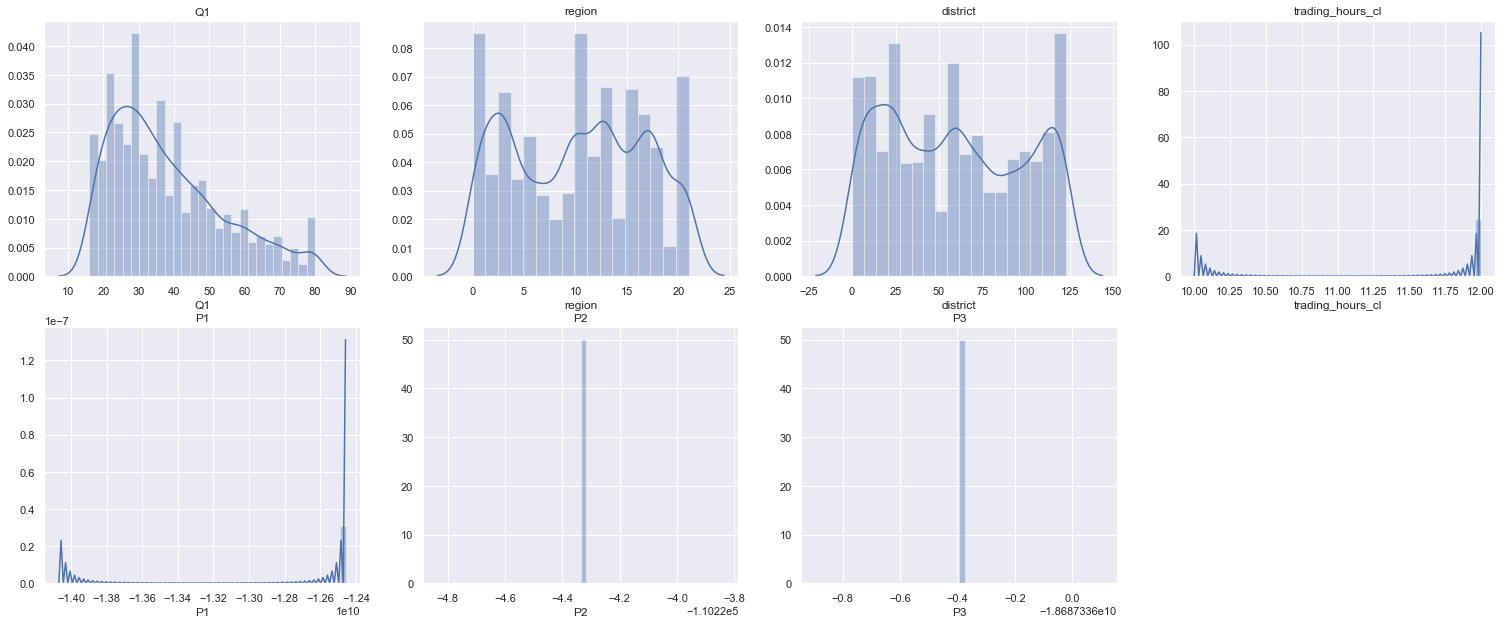

In [270]:
num_cols = ['Q1','region','district','trading_hours_cl','P1','P2','P3']
plt.figure(figsize=(26, 16))
for i,col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.distplot(X[col])
    plt.title(col)

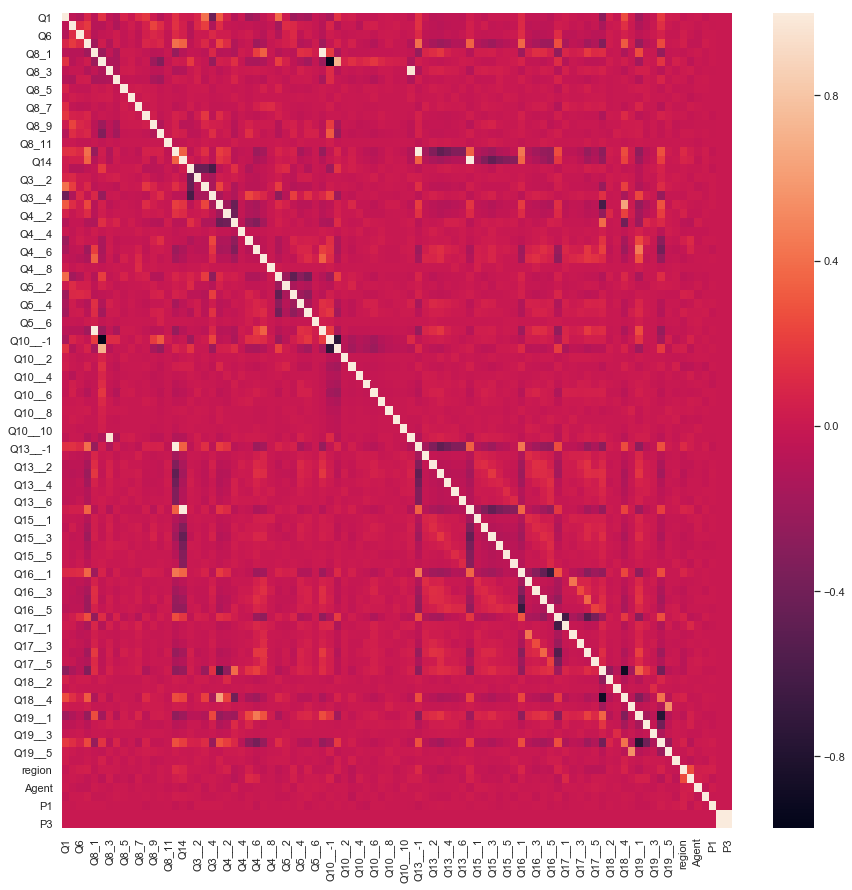

In [271]:
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr())

In [272]:
standard_sc_col = ['Q1']
MinMax_sc_col = list(X.drop(columns=standard_sc_col,axis=1).columns)

In [273]:
st_scaler = StandardScaler()
mM_scaler = MinMaxScaler()

In [274]:
for col in standard_sc_col:
    X[col] = pd.DataFrame(st_scaler.fit_transform(X[col].values.reshape(-1, 1)))
    test_copy[col] = pd.DataFrame(st_scaler.transform(test_copy[col].values.reshape(-1, 1)))
for col in MinMax_sc_col:
    X[col] = pd.DataFrame(mM_scaler.fit_transform(X[col].values.reshape(-1, 1)))
    test_copy[col] = pd.DataFrame(mM_scaler.transform(test_copy[col].values.reshape(-1, 1)))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to 

In [275]:
np.shape(test_copy),np.shape(X)

((2365, 91), (7094, 91))

In [276]:
X.to_csv('train_nural.csv',index=False)
test_copy.to_csv('test_nural.csv',index=False)
y.to_csv('y_nural.csv',index=False)

In [277]:
len(X),len(y)

(7094, 7094)

In [281]:
test_copy.tail()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist,region,district,Agent,trading_hours_cl,P1,P2,P3
2360,-0.756743,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.639520,0.619048,0.821138,0.0,1.0,1.0,0.0,0.0
2361,0.739032,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.912847,0.809524,0.065041,0.0,1.0,1.0,0.0,0.0
2362,0.676708,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.540059,0.809524,0.032520,0.0,1.0,1.0,0.0,0.0
2363,-0.632096,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.612230,0.428571,0.951220,0.0,1.0,1.0,0.0,0.0
2364,1.985512,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.832737,0.619048,0.430894,0.0,1.0,1.0,0.0,0.0


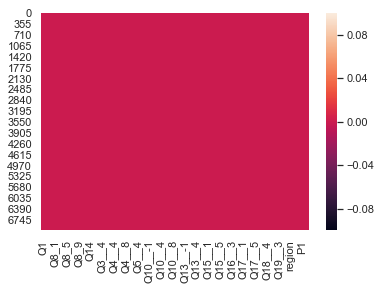

In [282]:
sns.heatmap(X.isna())

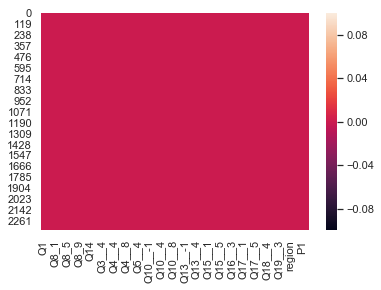

In [283]:
sns.heatmap(test_copy.isna())

In [284]:
new_train = X.copy()
new_test = test_copy.copy()
target= y.copy()

## begining of models

In [285]:
X= new_train
test_copy = new_test
y = target
X.head()

,Q1,Q2,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q12,Q14,Q3__1,Q3__2,Q3__3,Q3__4,Q4__1,Q4__2,Q4__3,Q4__4,Q4__5,Q4__6,Q4__7,Q4__8,Q5__1,Q5__2,Q5__3,Q5__4,Q5__5,Q5__6,Q9_new,Q10__-1,Q10__1,Q10__2,Q10__3,Q10__4,Q10__5,Q10__6,Q10__7,Q10__8,Q10__9,Q10__10,Q11_new,Q13__-1,Q13__1,Q13__2,Q13__3,Q13__4,Q13__5,Q13__6,Q15__-1,Q15__1,Q15__2,Q15__3,Q15__4,Q15__5,Q15__6,Q16__1,Q16__2,Q16__3,Q16__4,Q16__5,Q17__-1,Q17__1,Q17__2,Q17__3,Q17__4,Q17__5,Q18__1,Q18__2,Q18__3,Q18__4,Q18__5,Q19__1,Q19__2,Q19__3,Q19__4,Q19__5,dist,region,district,Agent,trading_hours_cl,P1,P2,P3
0,2.608751,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.707161,0.238095,0.227642,0.0,1.0,1.0,0.0,0.0
1,0.115792,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.420805,1.000000,1.000000,0.0,1.0,1.0,0.0,0.0
2,-1.255335,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.545355,0.523810,0.569106,0.0,1.0,1.0,0.0,0.0
3,0.739032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.592166,0.000000,0.219512,0.0,1.0,1.0,0.0,0.0
4,-0.258152,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.250595,0.714286,0.593496,0.0,1.0,1.0,0.0,0.0


In [286]:
from sklearn.model_selection import train_test_split

In [287]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
classifier = LogisticRegression(C=1e10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [290]:
classifier.fit(X_train,y_train)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [291]:
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

In [292]:
print('score: ',classifier.score(X_test,y_test))

score:  0.6632221700328793


In [293]:
print('F1 score is : {}'.format(f1_score(y_test,y_pred,average = 'weighted')))

F1 score is : 0.6261527119979451


In [371]:
y_pred_prob[0]

array([0.62105339, 0.26258807, 0.08177744, 0.0345811 ])

In [372]:
classifier.fit(X,y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [373]:
classifier.score(X,y)

0.6739498167465464

In [235]:
y_pred_prob = classifier.predict_proba(test_copy)

In [236]:
sub = pd.DataFrame(data=y_pred_prob)
sub.to_csv('pred3_basemodel.csv',index = False)

In [374]:
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [375]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_prob_rf = rf_clf.predict_proba(X_test)

In [376]:
print('score: ',rf_clf.score(X_test,y_test))

score:  0.6622827618600282


In [377]:
print('F1 score is : {}'.format(f1_score(y_test,y_pred_rf,average = 'weighted')))

F1 score is : 0.6308173706278801


In [309]:
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
rf_clf.score(X,y)

1.0

In [129]:
y_pred_prob_rf_clf = rf_clf.predict_proba(test_copy)

In [130]:
sub1 = pd.DataFrame(data=y_pred_prob_rf_clf)
sub1.to_csv('pred3_rf_clf.csv',index = False)

In [240]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 200,learning_rate=0.1,random_state=seed,algorithm='SAMME.R')

In [241]:
ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=200, random_state=42)

In [242]:
y_pred_ada = classifier.predict(X_test)
y_pred_prob_ada = classifier.predict_proba(X_test)

In [243]:
print('score: ',ada.score(X,y))

score:  0.6588666478714407


In [244]:
print('F1 score is : {}'.format(f1_score(y_test,y_pred_ada,average = 'weighted')))

F1 score is : 0.6405792952892688


In [294]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score  #Additional scklearn functions
from xgboost import plot_importance
from sklearn import  metrics 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [296]:
xgb0 = XGBClassifier(n_estimators=100,n_jobs=4,objective= 'multi:softprob')
xgb0.fit(X_train, y_train)
y_pred = xgb0.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(xgb0.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb0, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(learning_rate =0.1,n_estimators=200,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                     objective= 'multi:softprob',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=seed,silent=False)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.6f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 66.65%


KeyboardInterrupt: 

In [ ]:
old = 0.003724

In [ ]:
new = 0.003743

In [249]:
selection = SelectFromModel(xgb0, threshold=0.003743, prefit=True)
X = selection.transform(X)
test_copy = selection.transform(test_copy)

In [250]:
np.shape(X),np.shape(test_copy)

((7094, 59), (2365, 59))

In [251]:
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=200,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                     objective= 'multi:softprob',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=seed,silent=False)

In [341]:
xgb1.fit(X,y)
#rough prediction
predictions =  xgb1.predict(test_copy)
prediction_prob = xgb1.predict_proba(test_copy)
#y_pred_prob_xgb = xgb.predict_proba(test_copy)
sub1 = pd.DataFrame(data=prediction_prob)
sub1.to_csv('pred4_xgb12_rough.csv',index = False)

In [252]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 4
        xgtrain = xgb.DMatrix(X.values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='merror', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X,y,eval_metric='merror')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    fig, ax = plt.subplots(figsize=(10,8))
    plot_importance(alg, ax = ax)  
    
    '''feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')'''

In [253]:
X = pd.DataFrame(X)
test = pd.DataFrame(test)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,2.608751,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.238095,0.227642,0.0
1,0.115792,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,0.0
2,-1.255335,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.523810,0.569106,0.0
3,0.739032,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.219512,0.0
4,-0.258152,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.714286,0.593496,0.0


[0]	train-merror:0.337715+0.00417979	test-merror:0.351421+0.0116359
[1]	train-merror:0.331513+0.00214583	test-merror:0.343951+0.0119794
[2]	train-merror:0.332076+0.00339016	test-merror:0.342117+0.0145445
[3]	train-merror:0.330737+0.00221503	test-merror:0.344796+0.0117739
[4]	train-merror:0.328094+0.00180772	test-merror:0.340426+0.01378
[5]	train-merror:0.328764+0.00232907	test-merror:0.342118+0.0141136
[6]	train-merror:0.328587+0.00268778	test-merror:0.340567+0.0127212
[7]	train-merror:0.327213+0.00108274	test-merror:0.341836+0.0124153
[8]	train-merror:0.326015+0.00381409	test-merror:0.342118+0.0116626
[9]	train-merror:0.325909+0.00300312	test-merror:0.34099+0.011821
[10]	train-merror:0.325134+0.00300141	test-merror:0.341554+0.010531
[11]	train-merror:0.32464+0.00333246	test-merror:0.342259+0.0121599
[12]	train-merror:0.323548+0.00181497	test-merror:0.341131+0.0125435
[13]	train-merror:0.32309+0.00260058	test-merror:0.341131+0.0131012
[14]	train-merror:0.322174+0.00271053	test-merror:0

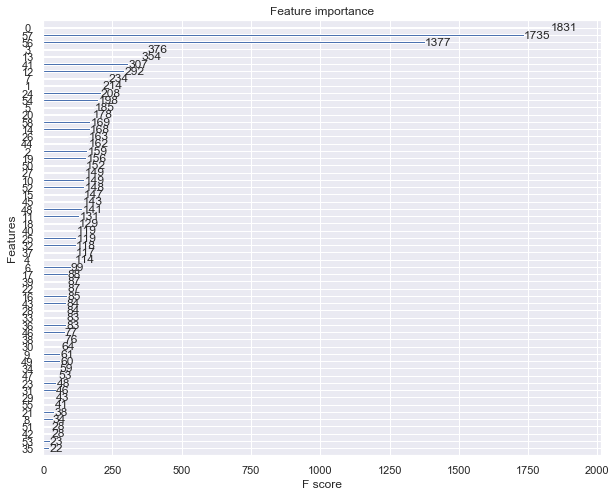

In [254]:
modelfit(xgb1, X, y)

In [324]:
0.7563,0.7604,0.7764

(0.7563, 0.7604, 0.7764)

In [325]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=187, max_depth=5,
                                    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                     objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=seed), 
                                     param_grid = param_test1, scoring='precision_micro',n_jobs=4,iid=False, cv=5,verbose=True)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 10.5min finished


({'max_depth': 3, 'min_child_weight': 5}, 0.6707065821711342)

In [326]:
0.6714088225289195,0.6707065821711342

(0.6714088225289195, 0.6707065821711342)

In [123]:
#sorted(metrics.SCORERS.keys())

In [256]:
pd.DataFrame(gsearch1.cv_results_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.442473,0.152914,0.031182,0.011226,3,1,"{'max_depth': 3, 'min_child_weight': 1}",0.681914,0.667371,0.665962,0.657969,0.671136,0.668871,0.007808,1,0.701921,0.702907,0.703789,0.704545,0.703012,0.703235,0.000884
1,10.865595,0.547408,0.030983,0.008409,3,3,"{'max_depth': 3, 'min_child_weight': 3}",0.680507,0.661029,0.665962,0.656559,0.670430,0.666897,0.008245,3,0.701040,0.700088,0.701145,0.703488,0.700722,0.701297,0.001156
2,9.792392,0.211022,0.020189,0.001469,3,5,"{'max_depth': 3, 'min_child_weight': 5}",0.681210,0.663848,0.667371,0.655148,0.669019,0.667319,0.008439,2,0.699454,0.700264,0.703965,0.703136,0.703364,0.702037,0.001817
3,15.754057,0.509537,0.040329,0.009791,5,1,"{'max_depth': 5, 'min_child_weight': 1}",0.667840,0.671600,0.650458,0.651622,0.671136,0.662531,0.009479,6,0.792879,0.790308,0.797885,0.798450,0.792320,0.794368,0.003223
4,15.998706,0.211595,0.043375,0.018085,5,3,"{'max_depth': 5, 'min_child_weight': 3}",0.667136,0.668781,0.651163,0.656559,0.671842,0.663096,0.007877,4,0.785651,0.777974,0.785903,0.791402,0.781399,0.784466,0.004542
5,15.045701,0.271333,0.033843,0.006327,5,5,"{'max_depth': 5, 'min_child_weight': 5}",0.668543,0.668076,0.648344,0.654443,0.673253,0.662532,0.009472,5,0.777543,0.772687,0.777269,0.775370,0.776114,0.775797,0.001742
6,22.691586,0.760474,0.040946,0.003649,7,1,"{'max_depth': 7, 'min_child_weight': 1}",0.651654,0.672304,0.639887,0.650212,0.666196,0.656051,0.011677,10,0.924731,0.921938,0.924758,0.922833,0.919324,0.922717,0.002018
7,21.224498,0.243245,0.047173,0.012867,7,3,"{'max_depth': 7, 'min_child_weight': 3}",0.666432,0.663848,0.640592,0.649506,0.666196,0.657315,0.010443,8,0.899877,0.891806,0.901322,0.896054,0.896248,0.897061,0.003328
8,20.043274,0.657620,0.044010,0.013914,7,5,"{'max_depth': 7, 'min_child_weight': 5}",0.665025,0.667371,0.647639,0.650917,0.664785,0.659147,0.008175,7,0.871849,0.871013,0.877181,0.872093,0.867007,0.871829,0.003244
9,28.608760,0.735381,0.061743,0.007939,9,1,"{'max_depth': 9, 'min_child_weight': 1}",0.649543,0.665257,0.649753,0.651622,0.668313,0.656898,0.008163,9,0.986779,0.989251,0.987313,0.988901,0.987493,0.987947,0.000957


In [327]:
param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=187, max_depth=3,
                                                    min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                     objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
                                                     param_grid = param_test3, scoring='precision_micro',n_jobs=4,iid=False, cv=5,return_train_score=True,verbose=True)
gsearch3.fit(X,y)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  2.7min finished


({'gamma': 0.0}, 0.6721149327767482)

In [328]:
0.6714069323107152,0.6721149327767482

(0.6714069323107152, 0.6721149327767482)

In [333]:
pd.DataFrame(gsearch3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.057286,0.140408,0.025170,0.007369,0,{'gamma': 0.0},0.674877,0.662438,0.653277,0.650212,0.659845,0.660130,0.008582,2,0.706328,0.711189,0.718414,0.715645,0.714462,0.713208,0.004148
1,8.517130,0.414702,0.025490,0.008844,0.1,{'gamma': 0.1},0.675581,0.661734,0.651868,0.648096,0.661256,0.659707,0.009537,4,0.706152,0.710308,0.717004,0.715116,0.714990,0.712714,0.003955
2,8.518751,0.247999,0.026638,0.010939,0.2,{'gamma': 0.2},0.674173,0.660324,0.656801,0.652327,0.657022,0.660129,0.007468,3,0.707738,0.711718,0.718238,0.714059,0.712524,0.712856,0.003406
3,8.160904,0.099318,0.025955,0.007012,0.3,{'gamma': 0.3},0.674877,0.661029,0.654686,0.650212,0.661962,0.660553,0.008352,1,0.705799,0.711894,0.718414,0.711945,0.710234,0.711657,0.004053
4,7.478368,2.015864,0.030590,0.002217,0.4,{'gamma': 0.4},0.673469,0.661029,0.653277,0.649506,0.659139,0.659284,0.008197,5,0.705976,0.711718,0.717709,0.713707,0.711643,0.712151,0.003792


[0]	train-merror:0.355547+0.00795453	test-merror:0.357907+0.010881
[1]	train-merror:0.3553+0.00803907	test-merror:0.358048+0.0116922
[2]	train-merror:0.355088+0.00810388	test-merror:0.357202+0.0119289
[3]	train-merror:0.3553+0.00828104	test-merror:0.357343+0.0116583
[4]	train-merror:0.355265+0.00825642	test-merror:0.357202+0.0115939
[5]	train-merror:0.349802+0.00491367	test-merror:0.351985+0.0178753
[6]	train-merror:0.351071+0.00382817	test-merror:0.351421+0.0186673
[7]	train-merror:0.348816+0.00337174	test-merror:0.350153+0.0171804
[8]	train-merror:0.347688+0.00310961	test-merror:0.347616+0.0146002
[9]	train-merror:0.34582+0.00548818	test-merror:0.348603+0.0143739
[10]	train-merror:0.34582+0.00466458	test-merror:0.347475+0.0141747
[11]	train-merror:0.34508+0.00466259	test-merror:0.34832+0.0131421
[12]	train-merror:0.344199+0.00374403	test-merror:0.348179+0.0140063
[13]	train-merror:0.343177+0.00426487	test-merror:0.349025+0.0146328
[14]	train-merror:0.342402+0.00292874	test-merror:0.3

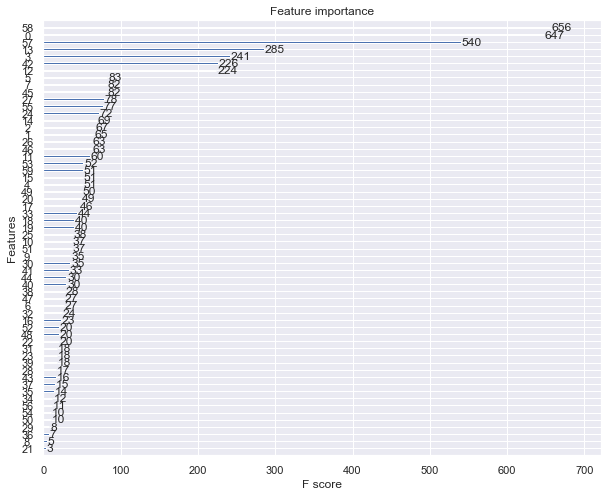

In [330]:
xgb2 = XGBClassifier(learning_rate =0.1,n_estimators=184,max_depth=3,min_child_weight=5,gamma=0.0,subsample=0.8,colsample_bytree=0.8,
                     objective= 'multi:softprob',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=seed,silent=False)
modelfit(xgb2, X, y)

In [331]:
param_test4 = {'subsample':[i/10.0 for i in range(6,10)],'colsample_bytree':[i/10.0 for i in range(6,10)]}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=184, max_depth=3,
 min_child_weight=5, gamma=0.00, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='precision_micro',n_jobs=4,iid=False, cv=5,return_train_score=True,verbose=True)
gsearch4.fit(X,y)
gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  8.5min finished


({'colsample_bytree': 0.7, 'subsample': 0.9}, 0.6725388594016866)

In [332]:
0.6693003144158708,0.6715535404286959,0.672679901305005,0.6725388594016866

(0.6693003144158708, 0.6715535404286959, 0.672679901305005, 0.6725388594016866)

In [147]:
pd.DataFrame(gsearch4.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.451122,0.397011,0.021388,0.006825,0.6,0.6,"{'colsample_bytree': 0.6, 'subsample': 0.6}",0.669951,0.649049,0.661734,0.649506,0.666196,0.659287,0.008578,9,0.666843,0.672599,0.672070,0.674419,0.673067,0.671800,0.002598
1,5.707445,0.085341,0.025586,0.007224,0.6,0.7,"{'colsample_bytree': 0.6, 'subsample': 0.7}",0.665025,0.656096,0.662438,0.648801,0.662668,0.659006,0.005900,10,0.666843,0.672599,0.668546,0.674066,0.673419,0.671095,0.002866
2,5.818382,0.061591,0.021388,0.006434,0.6,0.8,"{'colsample_bytree': 0.6, 'subsample': 0.8}",0.669951,0.651868,0.666667,0.643159,0.660550,0.658439,0.009811,13,0.667372,0.673656,0.668194,0.674242,0.671129,0.670919,0.002778
3,5.826679,0.097664,0.018190,0.002482,0.6,0.9,"{'colsample_bytree': 0.6, 'subsample': 0.9}",0.669951,0.654686,0.663848,0.641044,0.659139,0.657734,0.009762,15,0.666490,0.671894,0.666960,0.671952,0.669720,0.669403,0.002335
4,6.654677,0.138382,0.022387,0.004315,0.7,0.6,"{'colsample_bytree': 0.7, 'subsample': 0.6}",0.667136,0.651868,0.665257,0.653738,0.664785,0.660557,0.006407,1,0.667195,0.672423,0.672952,0.675123,0.673243,0.672187,0.002657
5,6.831106,0.053299,0.023787,0.006141,0.7,0.7,"{'colsample_bytree': 0.7, 'subsample': 0.7}",0.670654,0.655391,0.663848,0.647391,0.664785,0.660414,0.008131,3,0.665962,0.671366,0.668722,0.672304,0.672362,0.670143,0.002474
6,7.134696,0.244313,0.038978,0.017356,0.7,0.8,"{'colsample_bytree': 0.7, 'subsample': 0.8}",0.669247,0.655391,0.667371,0.644570,0.663373,0.659991,0.009062,7,0.667019,0.675947,0.667841,0.674947,0.670072,0.671165,0.003650
7,7.035379,0.198084,0.020187,0.005597,0.7,0.9,"{'colsample_bytree': 0.7, 'subsample': 0.9}",0.666432,0.653982,0.663143,0.644570,0.659139,0.657453,0.007666,16,0.664728,0.671894,0.666960,0.672833,0.669896,0.669262,0.003031
8,7.264659,0.126930,0.029184,0.002784,0.8,0.6,"{'colsample_bytree': 0.8, 'subsample': 0.6}",0.666432,0.652572,0.665257,0.647391,0.668313,0.659993,0.008394,6,0.667019,0.672070,0.669427,0.675123,0.672538,0.671236,0.002777
9,7.482935,0.166583,0.028583,0.005569,0.8,0.7,"{'colsample_bytree': 0.8, 'subsample': 0.7}",0.665728,0.655391,0.665257,0.646685,0.669019,0.660416,0.008240,2,0.666138,0.673656,0.669956,0.675828,0.673243,0.671764,0.003383


[0]	train-merror:0.357626+0.00734126	test-merror:0.359034+0.0126402
[1]	train-merror:0.35241+0.00839988	test-merror:0.354806+0.0110176
[2]	train-merror:0.351882+0.00767973	test-merror:0.354524+0.0134937
[3]	train-merror:0.349133+0.00824882	test-merror:0.351987+0.00962607
[4]	train-merror:0.348604+0.00879451	test-merror:0.353255+0.0103918
[5]	train-merror:0.349132+0.00872446	test-merror:0.352692+0.00973527
[6]	train-merror:0.349097+0.00870292	test-merror:0.352692+0.00944516
[7]	train-merror:0.350789+0.00709129	test-merror:0.355229+0.0126477
[8]	train-merror:0.34804+0.0037323	test-merror:0.353113+0.0144192
[9]	train-merror:0.347441+0.0044404	test-merror:0.352409+0.0140022
[10]	train-merror:0.346419+0.00448539	test-merror:0.352127+0.0124238
[11]	train-merror:0.34589+0.00482295	test-merror:0.351563+0.0137235
[12]	train-merror:0.342472+0.0044305	test-merror:0.347051+0.0148738
[13]	train-merror:0.340675+0.00370914	test-merror:0.347051+0.0152069
[14]	train-merror:0.341133+0.0046186	test-merro

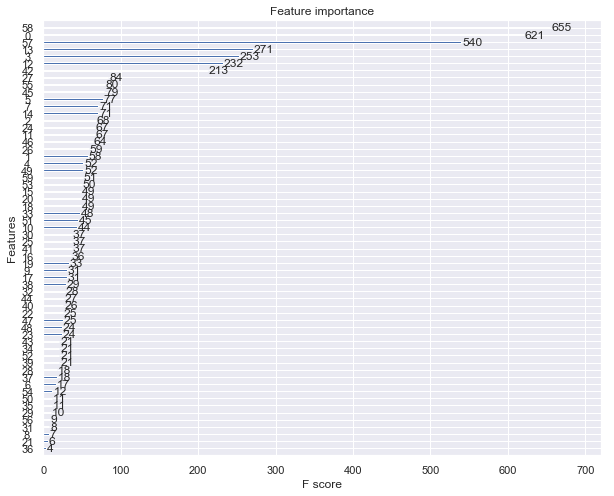

In [334]:
xgb3 = XGBClassifier(learning_rate =0.1,n_estimators=184,max_depth=3,min_child_weight=5,gamma=0.0,subsample=0.9,colsample_bytree=0.7,
                     objective= 'multi:softprob',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=seed,silent=False)
modelfit(xgb3, X, y)


In [335]:
xgb3.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=184, n_jobs=1, nthread=4, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=False, subsample=0.9)

In [336]:
np.shape(X),np.shape(test_copy)

((7094, 60), (2365, 60))

In [340]:
predictions =  xgb3.predict(test_copy)
prediction_prob = xgb3.predict_proba(test_copy)
#y_pred_prob_xgb = xgb.predict_proba(test_copy)
sub1 = pd.DataFrame(data=prediction_prob)
sub1.to_csv('pred4_xgb12.csv',index = False)

In [338]:
len(test_copy),len(prediction_prob),len(sample_sub)

(2365, 2365, 2365)

In [339]:
pd.DataFrame(prediction_prob).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

## lgbm

In [297]:
import lightgbm as lgbm
d_train = lgbm.Dataset(X_train,label=y_train)
params = {}
params['learning_rate'] = 0.003
params['objective'] = 'multiclass'
params['metric'] ='multi_logloss'
params['boosting_type'] ='gbdt'

params['sub_feature'] = 0.5
params['num_class'] = 4
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
params['early_stopping_round'] = 50
params['device'] = 'cpu'



In [298]:
lgb_eval = lgbm.Dataset(X_test,y_test,reference=d_train)
#model = lgbm.train(params,d_train,num_boost_round= 10000,valid_sets=lgb_eval,early_stopping_rounds=5)

In [299]:
lgb_eval = lgbm.Dataset(X_test,y_test,reference=d_train)
model = lgbm.train(params,d_train,num_boost_round= 10000,valid_sets=lgb_eval,early_stopping_rounds=50)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:121: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.26151
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.25994
[3]	valid_0's multi_logloss: 1.25846
[4]	valid_0's multi_logloss: 1.25683
[5]	valid_0's multi_logloss: 1.25543
[6]	valid_0's multi_logloss: 1.254
[7]	valid_0's multi_logloss: 1.25259
[8]	valid_0's multi_logloss: 1.25102
[9]	valid_0's multi_logloss: 1.24958
[10]	valid_0's multi_logloss: 1.24799
[11]	valid_0's multi_logloss: 1.2465
[12]	valid_0's multi_logloss: 1.24526
[13]	valid_0's multi_logloss: 1.2439
[14]	valid_0's multi_logloss: 1.24262
[15]	valid_0's multi_logloss: 1.24117
[16]	valid_0's multi_logloss: 1.23979
[17]	valid_0's multi_logloss: 1.23833
[18]	valid_0's multi_logloss: 1.23685
[19]	valid_0's multi_logloss: 1.23535
[20]	valid_0's multi_logloss: 1.23376
[21]	valid_0's multi_logloss: 1.23243
[22]	valid_0's multi_logloss: 1.23091
[23]	valid_0's multi_logloss: 1.22938
[24]	valid_0's multi_logloss: 1.22786
[25]	valid_0's multi_logloss: 1.22636
[

In [300]:
#loss
0.75211,0.751141

(0.75211, 0.751141)

In [301]:
y_pred_lgbm = model.predict(X_test)
y_pred_lgbm

array([[0.61906878, 0.30237329, 0.03783603, 0.04072189],
       [0.25939971, 0.68790468, 0.02100222, 0.03169339],
       [0.00273612, 0.01020741, 0.26214667, 0.7249098 ],
       ...,
       [0.00177884, 0.00514518, 0.08638714, 0.90668884],
       [0.02918715, 0.09885769, 0.08925228, 0.78270289],
       [0.00124913, 0.00689633, 0.04411822, 0.94773633]])

In [302]:
d_train = lgbm.Dataset(X,label=y)
params = {}
params['learning_rate'] = 0.003
params['objective'] = 'multiclass'
params['metric'] ='multi_logloss'
params['boosting_type'] ='gbdt'
params['sub_feature'] = 0.5
params['num_class'] = 4
params['num_leaves'] = 12
params['min_data'] = 50
params['max_depth'] = 12
params['early_stopping_round'] = 50
params['device'] = 'cpu'



In [303]:
model = lgbm.train(params,d_train,num_boost_round= 3747)

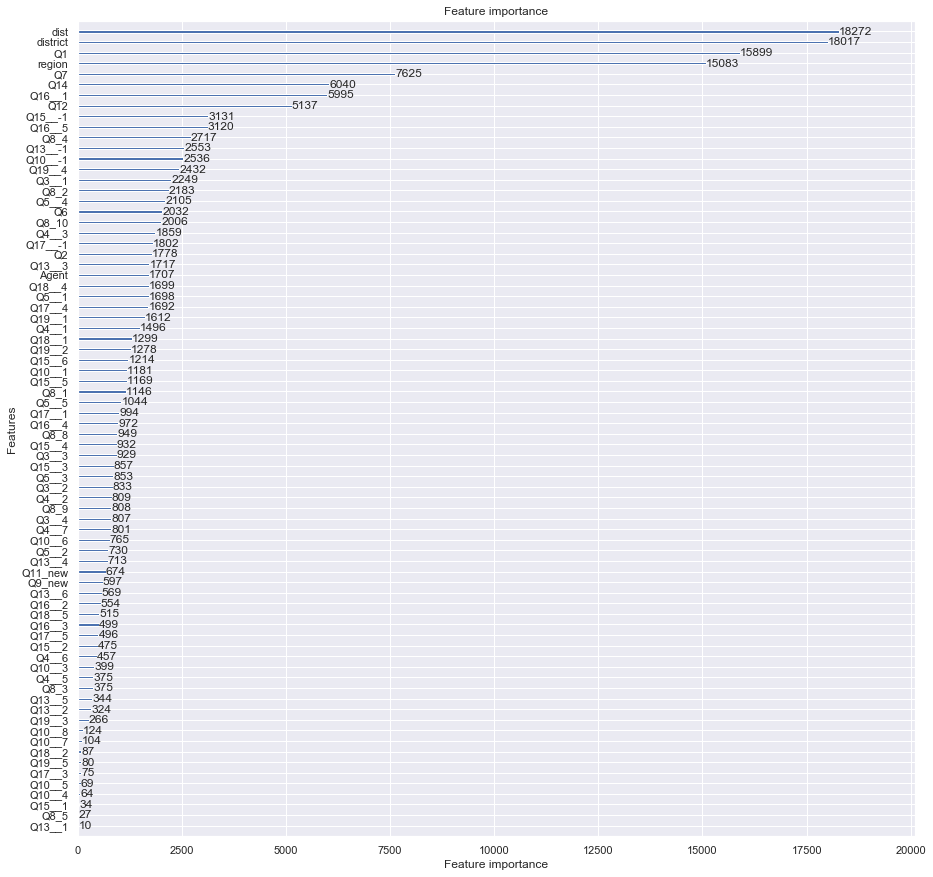

In [304]:
fig, ax = plt.subplots(figsize=(15,15))
lgbm.plot_importance(model,importance_type = 'split',max_num_features = len(X.columns),ax=ax)
#lgbm.plot_importance(model,importance_type = 'gain',max_num_features = len(X.columns),ax=ax)

In [305]:
predictions_lgmb =  model.predict(test_copy)
#prediction_prob_lgmb = model.predict_proba(test_copy)
#y_pred_prob_xgb = xgb.predict_proba(test_copy)
sub1 = pd.DataFrame(data=predictions_lgmb)
sub1.to_csv('pred5_lgmb5.csv',index = False)

In [ ]:
lgb_cv = lgbm.cv(params,d_train,num_boost_round=1000,nfold=5,shuffle=True,verbose_eval=20,early_stopping_rounds=50)
nround = lgb_cv(['multi_logloss-mean'].index(np.min(lgb_cv['multi_logloss-mean'])))
model = lgbm.train(params,d_train,num_boost_round= nround)

## Begining  stacking 